# Predicting if the client will subscribe to term deposit or not

### 1. Importing the required liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the dataframe

In [2]:
df = pd.read_csv(r"bank.csv", index_col=None, header=0, delimiter=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 3. Understanding the data and basic preprocessing

In [3]:
pip install pandas --upgrade

Requirement already up-to-date: pandas in c:\users\vishw\newpythoninstall\lib\site-packages (1.3.5)
Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.shape

(41188, 21)

In [6]:
# creating a copy of a dataframe
df1 = pd.DataFrame(df)
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Statistical Summary

df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

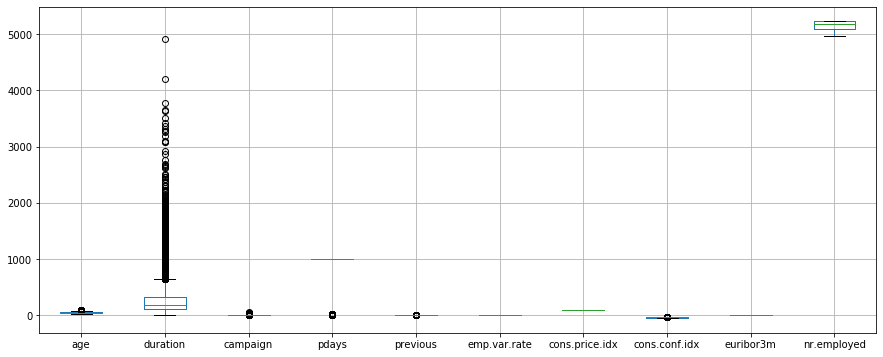

In [11]:
# Box plot to check the outliers in the data

plt.figure(figsize=(15, 6))
df1.boxplot()

In [12]:
# Printing unique values 

for i in df1.columns:
    print({i:df1[i].unique()})

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)}
{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['no', 'yes', 'unknown'], dtype=object)}
{'loan': array(['no', 'yes', 'unknown'], dtype=object)}
{'c

In [13]:
df1.nunique()  # to check the number of unique values in each column

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
df1["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

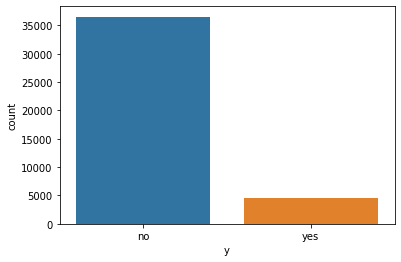

In [15]:
sns.countplot(df['y'],label="Count")

#### From the above plot it can be seen that the target variable is highly imbalanced

### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [16]:
# Seperating categrical columns in the dataframe

Cat_col = []

for i in df1.columns:
    if df1[i].dtype == "object":
        Cat_col.append(i)
        
Cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

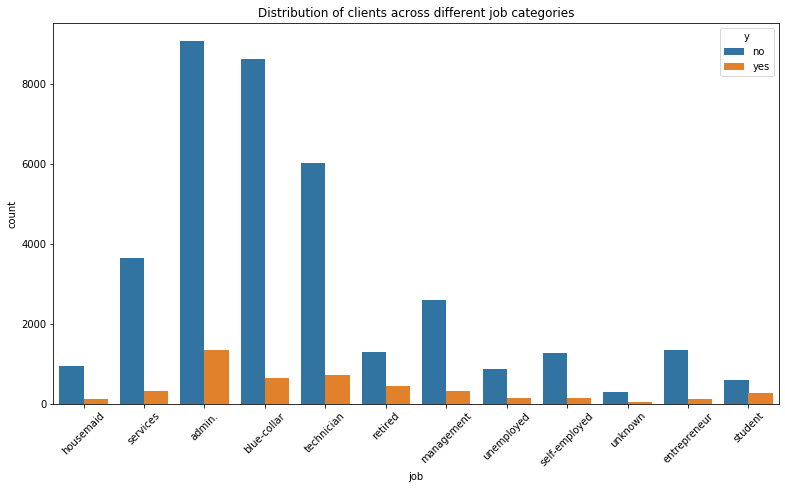

In [17]:
plt.figure(figsize=(13, 7))
sns.countplot(x="job", hue="y",data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients across different job categories")
plt.show()

* The above job plot shows that the largest number of workers are in the "admin" category, followed by "blue-collar" and "technician".
* There are relatively very few workers working in the "unknown" category.
* Number of people working in the "housemaid", "self-employed", ""entrepreneur" are almost similar.
* There are several Students and retired persons who are not working.
* Almost from all the job category some people have their deposit in the bank

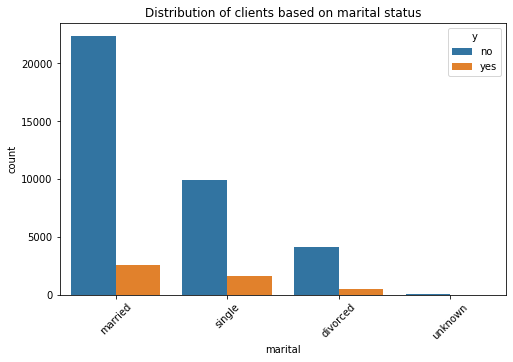

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x="marital", hue = "y", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients based on marital status")
plt.show()

* From the above plot, we may conclude that the number of married people is higher than that of single and divorced people.
and the number of people who have made term deposits in bank are mostly married followed by single people

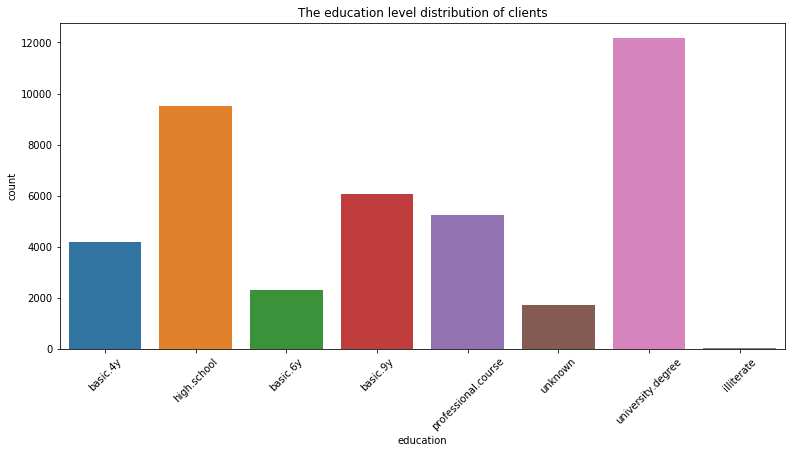

In [19]:
plt.figure(figsize=(13, 6))
sns.countplot(x="education", data=df1)
plt.xticks(rotation=45)
plt.title("The education level distribution of clients")
plt.show()
plt.show()

* The graph shows that the largest number of people have a university degree, followed by those with a high school education. There are relatively few students who are illiterate or have only a basic education.

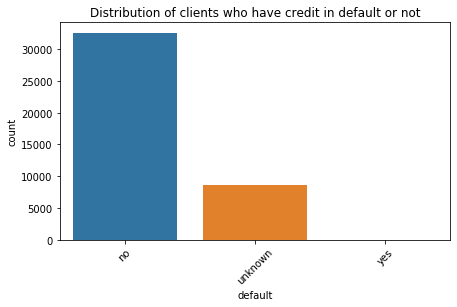

In [20]:
plt.figure(figsize=(7, 4))
sns.countplot(x="default", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients who have credit in default or not")
plt.show()

* Most likely, all the people do not have any credit defaults, while the people whose whole credit default is unknown are very few.

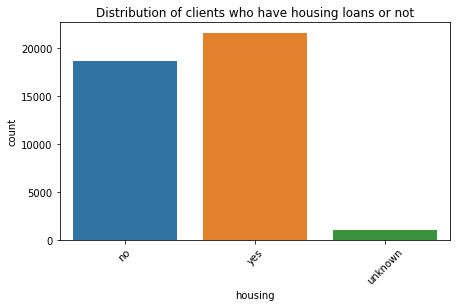

In [21]:
plt.figure(figsize=(7, 4))
sns.countplot(x="housing", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients who have housing loans or not")
plt.show()

* The number of people who have a housing loan and those who do not have a housing loan is almost identical. There are some people whose housing loan status is still unknown.

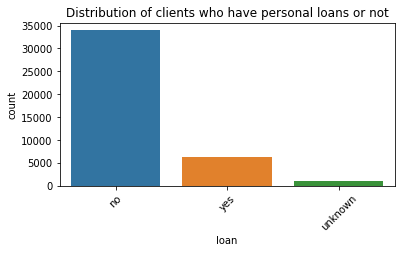

In [22]:
plt.figure(figsize=(6, 3))
sns.countplot(x="loan", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients who have personal loans or not")
plt.show()

* The number of people who have a housing loan are very less as compared to the people who do not have any housing loan.There are some people whose personal loan status is still unknown.

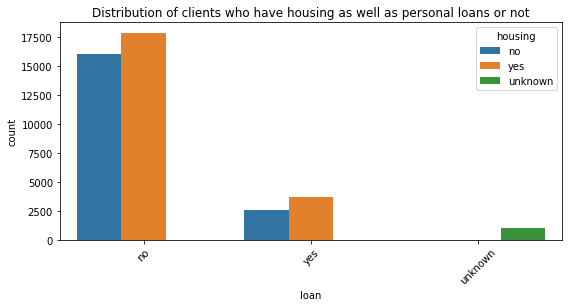

In [23]:
plt.figure(figsize=(9, 4))
sns.countplot(x="loan", hue="housing", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of clients who have housing as well as personal loans or not")
plt.show()

* People having both the housing loan and personal loan are almost same and vice versa

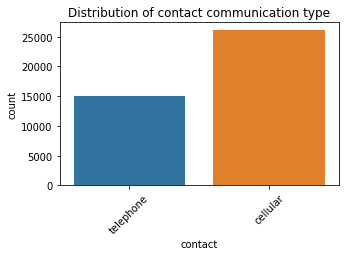

In [24]:
plt.figure(figsize=(5, 3))
sns.countplot(x="contact", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of contact communication type")
plt.show()

* The number of people using cell phones for communication are comperatively high as compared to people using telephones

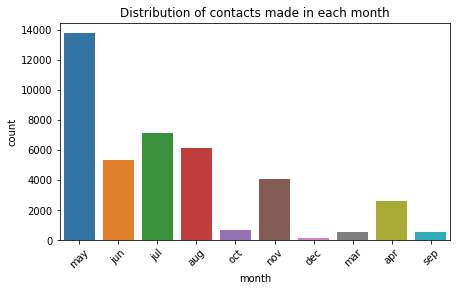

In [25]:
plt.figure(figsize=(7, 4))
sns.countplot(x="month", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of contacts made in each month")
plt.show()

* From the above plot it is clearly seen that most of the contacts made with their bank customers are in the month of may followed by july, august and june.

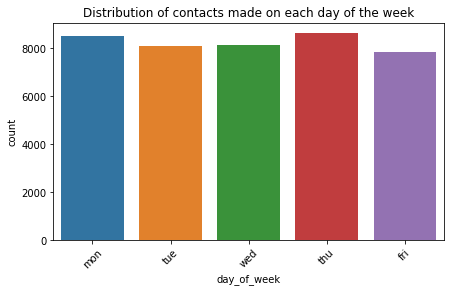

In [26]:
plt.figure(figsize=(7, 4))
sns.countplot(x="day_of_week", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of contacts made on each day of the week")
plt.show()

* Amost there are same number of contacts made with the bank customers in each day of the week starting from monday to Friday

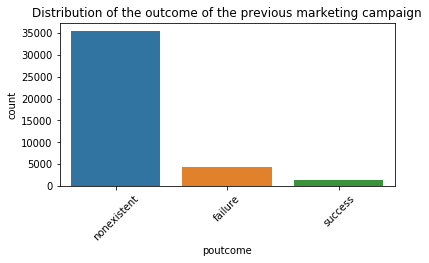

In [27]:
plt.figure(figsize=(6, 3))
sns.countplot(x="poutcome", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of the outcome of the previous marketing campaign")
plt.show()

* The previous marketing campaign did not resulted in much success by the bank as seen in the above plot

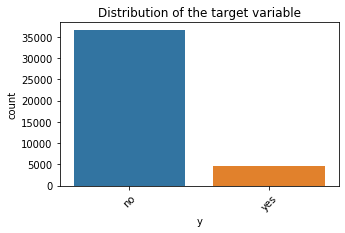

In [28]:
plt.figure(figsize=(5, 3))
sns.countplot(x="y", data=df1)
plt.xticks(rotation=45)
plt.title("Distribution of the target variable")
plt.show()

In [29]:
# checking the relationship of categorical variable with dependent variable using pairplot 
# (Understanding how each categorical feature relates to the target variable)


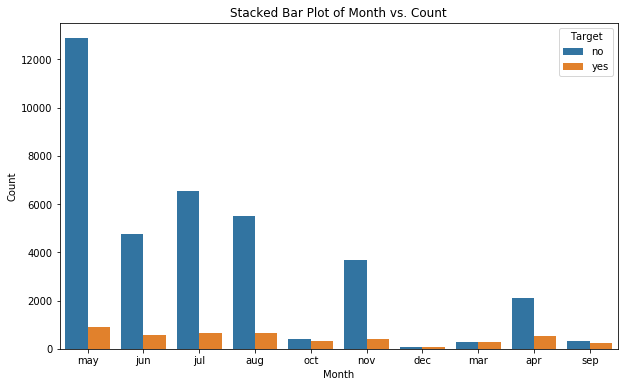

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x="month", hue="y", data=df1)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Month vs. Count')
plt.legend(title='Target')
plt.show()

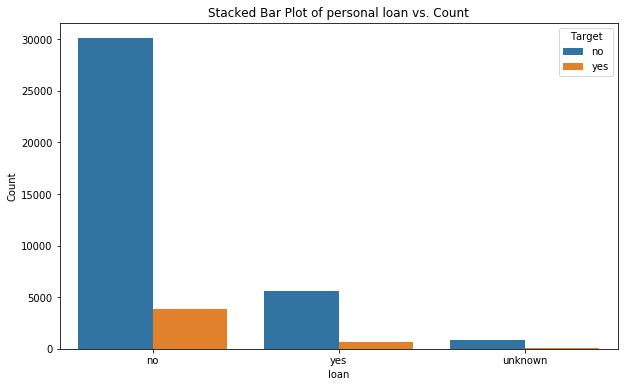

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x="loan", hue="y", data=df1)
plt.xlabel('loan')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of personal loan vs. Count')
plt.legend(title='Target')
plt.show()

* Very few people who have taken a personal loan have a term deposit in the bank; the majority of people who have not taken the loan do not have a term deposit in the bank. For some people, it's still unknown.

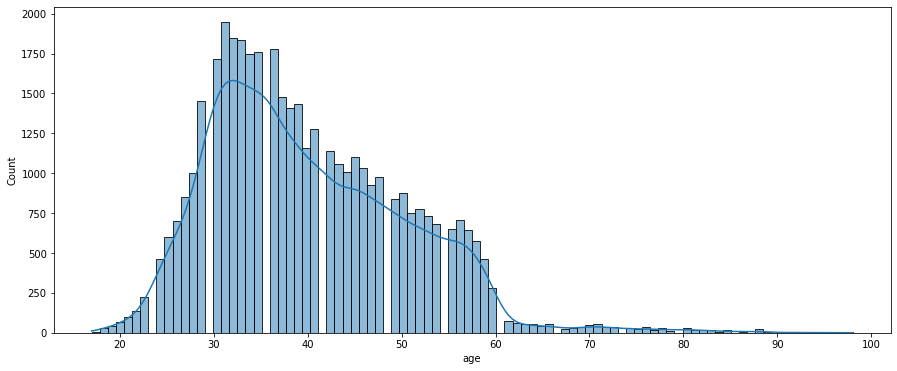

In [32]:
# Plotting histogram for age analysis
plt.figure(figsize=(15, 6))
sns.histplot(data = df1, x="age", kde = True)
plt.show()

* From the above age distribution plot it can be seen that most of the people belong to 25 to 60 year age group
* There are very few people between the age group 60 to 100

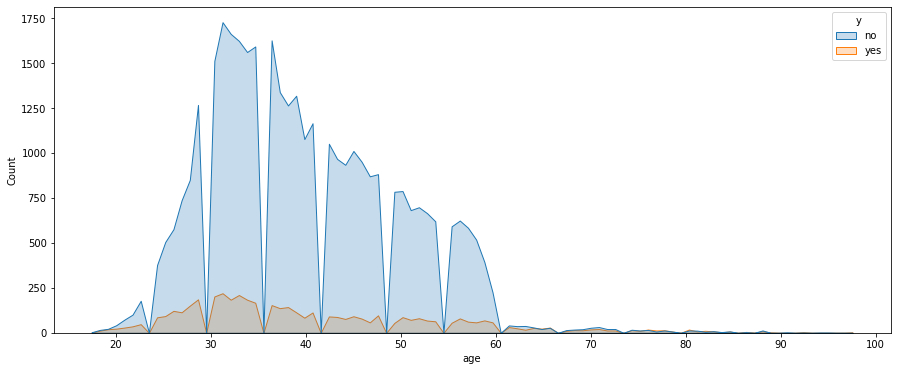

In [33]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df1, x="age", 
             kde = False, 
             hue = "y",
             element="poly")
plt.show()

* From the above plot, it can be concluded that mostly very few people belonging to the age group 25 to 60 have done bank term deposits compared to the 60 to 100 age group.

### Q.2. Perform the following pre-processing tasks:

### a. Missing Value Analysis

In [34]:
missing_values = df1.isnull().sum()  # Finding the missing values using in-built function
print(missing_values)                # Printing the missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


> There is no missing value in the above Dataframe

### b. Label Encoding wherever required

In [35]:
from sklearn import preprocessing   

le=preprocessing.LabelEncoder()

for x in Cat_col:
    df[x] = le.fit_transform(df[x]) 

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature:', x)
    print('Mapping:', le_name_mapping)

Feature: job
Mapping: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Feature: marital
Mapping: {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
Feature: education
Mapping: {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
Feature: default
Mapping: {'no': 0, 'unknown': 1, 'yes': 2}
Feature: housing
Mapping: {'no': 0, 'unknown': 1, 'yes': 2}
Feature: loan
Mapping: {'no': 0, 'unknown': 1, 'yes': 2}
Feature: contact
Mapping: {'cellular': 0, 'telephone': 1}
Feature: month
Mapping: {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Feature: day_of_week
Mapping: {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Feature: poutcome
Mapping: {'failure': 0, 'nonexistent': 1, 'success': 2}
Feature: y

In [36]:
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### c. Selecting important features based on Decision Trees and  e. Standardizing the data using any one of the scalers provided by sklearn

In [37]:
X = df1.values[:,0:-1]
Y = df1.values[:,-1]
Y = Y.astype(int)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

### Splitting the data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28831, 20)
(12357, 20)
(28831,)
(12357,)


### Running a base Decision tree model

In [41]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train, Y_train)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[10231   704]
 [  662   760]]

0.8894553694262362

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.52      0.53      0.53      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [43]:
model_DT.score(X_train, Y_train)

1.0

In [44]:
model_DT.feature_importances_   # to measure the importance of each variable

array([0.08996802, 0.04013096, 0.01996154, 0.03592162, 0.01037032,
       0.01776655, 0.01389931, 0.00749344, 0.01810792, 0.0353778 ,
       0.34610753, 0.03442256, 0.0129708 , 0.01049446, 0.02209153,
       0.00319365, 0.0111323 , 0.02291951, 0.08700861, 0.16066159])

In [45]:
print(list(zip(df1.columns[0:-1],model_DT.feature_importances_)))

[('age', 0.08996801936327219), ('job', 0.04013095892992523), ('marital', 0.01996154458691543), ('education', 0.03592161871024675), ('default', 0.010370322076893505), ('housing', 0.017766545272659286), ('loan', 0.013899309081467658), ('contact', 0.007493438913052227), ('month', 0.018107915966921358), ('day_of_week', 0.03537779981108333), ('duration', 0.3461075314090285), ('campaign', 0.034422555722240546), ('pdays', 0.012970799443182792), ('previous', 0.010494455744138188), ('poutcome', 0.022091529722016588), ('emp.var.rate', 0.003193651220532888), ('cons.price.idx', 0.011132302649636888), ('cons.conf.idx', 0.022919506441438867), ('euribor3m', 0.08700860610768632), ('nr.employed', 0.16066158882766166)]


In [46]:
sample=pd.DataFrame()
 
sample["Column"]=df1.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
10,duration,0.346108
19,nr.employed,0.160662
0,age,0.089968
18,euribor3m,0.087009
1,job,0.040131
3,education,0.035922
9,day_of_week,0.035378
11,campaign,0.034423
17,cons.conf.idx,0.022920
14,poutcome,0.022092


> By using the Decision Tree feature importance function, we have gotten the percentage of columns and how important they are, through which we can decide which column we can consider while building the model.

> From the above table the bottom 4 columns can be dropped as they do not have much importance

### d. Handling unbalanced data using SMOTE

In [47]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3218
Before OverSampling, counts of label '0':  25613
After OverSampling, the shape of train_X:  (51226, 20)
After OverSampling, the shape of train_y:  (51226,)
After OverSampling, counts of label '1':  25613
After OverSampling, counts of label '0':  25613


In [48]:
#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train_res, Y_train_res)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[10229   706]
 [  686   736]]

0.8873512988589464

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.51      0.52      0.51      1422

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



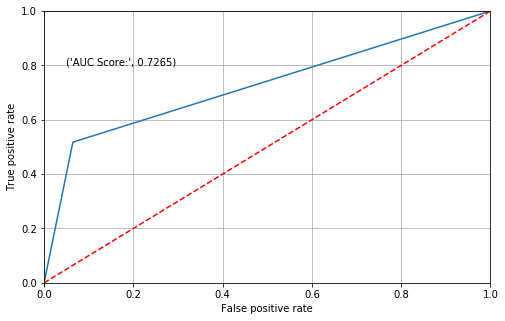

In [50]:
#### Plotting the AUC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(Y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# plot the grid
plt.grid(True)

### OVER SAMPLING of data

In [51]:
df1["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [52]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df1[df1["y"]==0]
df_minority = df1[df1["y"]==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled["y"].value_counts()

1    100000
0     36548
Name: y, dtype: int64

In [53]:
X = df_upsampled.values[:,:-1]
Y = df_upsampled.values[:,-1]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
#print(X)

In [55]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [56]:
from sklearn.linear_model import LogisticRegression
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, Y_train)
  
Y_pred = lr.predict(X_test)

In [57]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 8318  2572]
 [ 1213 28862]]
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81     10890
         1.0       0.92      0.96      0.94     30075

    accuracy                           0.91     40965
   macro avg       0.90      0.86      0.88     40965
weighted avg       0.91      0.91      0.91     40965



# Under sampling of data

In [58]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df1[df1["y"]==0]
df_minority = df1[df1["y"]==1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled["y"].value_counts()

1    4640
0    1000
Name: y, dtype: int64

In [59]:
X = df_downsampled.values[:,:-1]
Y = df_downsampled.values[:,-1]

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
#print(X)

In [61]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [62]:
# logistic regression object
lr = LogisticRegression()
  
# training the model on train set
lr.fit(X_train, Y_train)
  
Y_pred = lr.predict(X_test)

In [63]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 227   68]
 [  35 1362]]
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       295
         1.0       0.95      0.97      0.96      1397

    accuracy                           0.94      1692
   macro avg       0.91      0.87      0.89      1692
weighted avg       0.94      0.94      0.94      1692



### Q.3. Build the following Supervised Learning models:
* a. Logistic Regression
* b. Decision Trees
### Q.4. Tabulate the performance metrics of all the above models...

### 1. Logistic regression

In [64]:
# create a model
classifier = LogisticRegression()

# fitting training data into the model
classifier.fit(X_train, Y_train)

# predict using model
y_pred=classifier.predict(X_test)

print(list(zip(Y_test, y_pred)))

[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.

In [65]:
print(list(zip(df1.columns[:-1], classifier.coef_.ravel())))
print(classifier.intercept_)

[('age', 0.1838087046554894), ('job', 0.12231351556135771), ('marital', 0.007647968420022628), ('education', 0.18693622419547906), ('default', -0.15332708855958965), ('housing', -0.026390875910414714), ('loan', 0.11547965640987395), ('contact', -0.1786990209388636), ('month', -0.6916228960599464), ('day_of_week', 0.051313100077058395), ('duration', 3.6630857359685174), ('campaign', -0.10118641716220388), ('pdays', -0.3621116683588351), ('previous', -0.06577287650971642), ('poutcome', 0.2793296226422469), ('emp.var.rate', -2.9323874823803644), ('cons.price.idx', 0.388114919682809), ('cons.conf.idx', -0.19333963195231976), ('euribor3m', 2.8485990121903035), ('nr.employed', -2.281030917930126)]
[3.57690042]


In [66]:
# Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test, y_pred))

acc = accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ", acc) 

[[ 227   68]
 [  35 1362]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       295
         1.0       0.95      0.97      0.96      1397

    accuracy                           0.94      1692
   macro avg       0.91      0.87      0.89      1692
weighted avg       0.94      0.94      0.94      1692

Accuracy of the model:  0.9391252955082743


#### Plotting the AUC curve

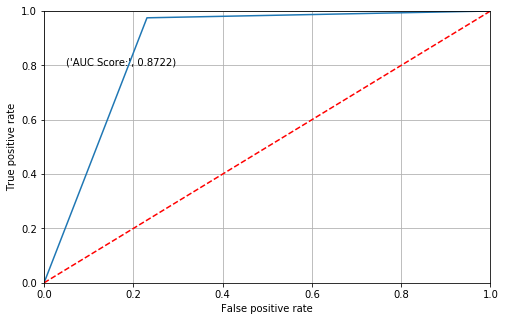

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(Y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# plot the grid
plt.grid(True)

* The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)
*  The AUC score provides a single scalar value representing the overall performance of the classifier; a higher AUC indicates better performance.

### Tuning the logistic regression model using GridSearchCV

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l1', 'l2'],                 # Penalty type
    'solver': ['liblinear', 'saga']          # Solver type
}

# Create a logistic regression classifier
classifier = LogisticRegression()

# Fitting training data into the model with hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best classifier
best_classifier = grid_search.best_estimator_

# Predict using the best classifier
y_pred = best_classifier.predict(X_test)

# Print the predictions
print(list(zip(Y_test, y_pred)))

[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.

In [69]:
# Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test, y_pred))

acc = accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ", acc) 

[[ 230   65]
 [  33 1364]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       295
         1.0       0.95      0.98      0.97      1397

    accuracy                           0.94      1692
   macro avg       0.91      0.88      0.89      1692
weighted avg       0.94      0.94      0.94      1692

Accuracy of the model:  0.942080378250591


#### Plotting the Auc curve

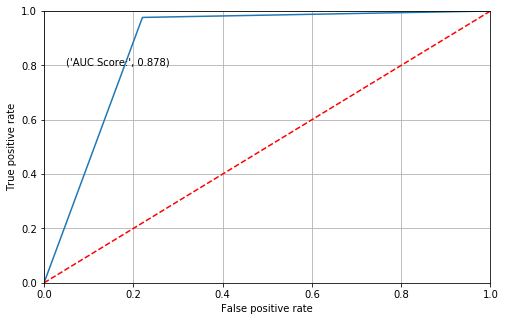

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(Y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# plot the grid
plt.grid(True)

### 2. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=10,
                                           criterion="gini")

#fitting the model on the data and predicting the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

print(Y_pred)

[1. 1. 1. ... 1. 0. 1.]


In [72]:
print(list(zip(Y_test, Y_pred)))

[(0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[ 236   59]
 [  85 1312]]

0.9148936170212766

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       295
         1.0       0.96      0.94      0.95      1397

    accuracy                           0.91      1692
   macro avg       0.85      0.87      0.86      1692
weighted avg       0.92      0.91      0.92      1692



#### Plotting the AUC Curve

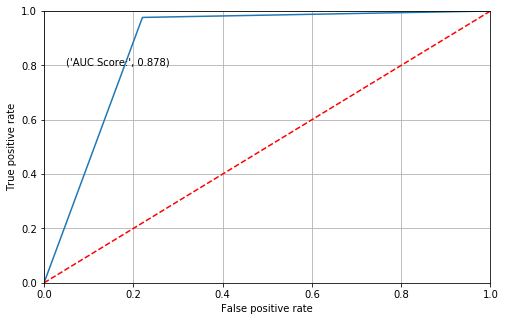

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(Y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# plot the grid
plt.grid(True)

### Training data accuracy

In [75]:
model_DecisionTree.score(X_train,Y_train)  

1.0

### Tuning the Base Decision tree model using GridSearch Cv

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
classifier = DecisionTreeClassifier(random_state=10)

# Grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator
best_classifier = grid_search.best_estimator_

# Fit the best classifier on the training data
best_classifier.fit(X_train, Y_train)

# Predict using the best classifier
y_pred = best_classifier.predict(X_test)

# Print the predictions
print(y_pred)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
[1. 1. 1. ... 1. 0. 1.]


### Building a Decision Tree model based on the above Best parameters

In [77]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=10,
                                            criterion="entropy",
                                            max_depth=10,
                                            min_samples_leaf=4,
                                            min_samples_split=10)

#fitting the model on the data and predicting the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

print(Y_pred)

[1. 1. 1. ... 1. 0. 1.]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[ 227   68]
 [  44 1353]]

0.933806146572104

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       295
         1.0       0.95      0.97      0.96      1397

    accuracy                           0.93      1692
   macro avg       0.89      0.87      0.88      1692
weighted avg       0.93      0.93      0.93      1692



#### Plotting the AUC curve

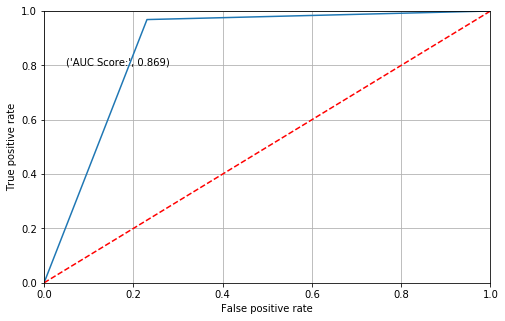

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(Y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# plot the grid
plt.grid(True)

Conclusion: 
    1. From all of the above models, it can be concluded that both (Logistic regression and Decision tree) models are performing very well. Even after tuning them, we are getting very good accuracy, as well as an AUC score above 0.85%, which is close to 1, which means the model is a very good one.
    2. When we handle the imbalance data using Smote we get a relatively less accuracy and AUC score as compared to the other models.